## ISO8601 Format

[https://en.wikipedia.org/wiki/ISO_8601](https://en.wikipedia.org/wiki/ISO_8601)

In [62]:
library('tidyverse')
library('lubridate')

In [53]:
date = "2021-05-04"

In [58]:
ymd(date) |> month()

[1] 5

In [56]:
df = tribble(
  ~colA, ~colB,
  "01-2021-01",   1,
  "01-2022-01",   2,
  "01-2023-01",   3
)

df

colA,colB
<chr>,<dbl>
01-2021-01,1
01-2022-01,2
01-2023-01,3


In [16]:
df |> mutate(colA = ymd(colA))

colA,colB
<date>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


In [57]:
df |> mutate(colA = parse_date(colA, format = '%m-%Y-%d'))

colA,colB
<date>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


[Format specification](https://readr.tidyverse.org/reference/parse_datetime.html#format-specification)

## Reading in dates

In [20]:
bird_feeder_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv'
)

bird_feeder_data |> 
    select(Year, Month, Day, species_code, how_many) |>
    head()

Rows: 100000 Columns: 22
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): loc_id, subnational1_code, entry_technique, sub_id, obs_id, PROJ_P...
dbl (14): latitude, longitude, Month, Day, Year, how_many, valid, reviewed, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Month,Day,species_code,how_many
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2021,3,4,amegfi,20
2020,12,19,moudov,11
2021,2,13,tuftit,2
2021,1,13,houspa,2
2021,1,11,balori,10
2021,3,13,norcar,2


In [21]:
bird_feeder_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv',
    col_types = cols(Year = col_date('%Y'))
)

bird_feeder_data |> 
    select(Year, Month, Day, species_code, how_many) |>
    head()

Year,Month,Day,species_code,how_many
<date>,<dbl>,<dbl>,<chr>,<dbl>
2021-01-01,3,4,amegfi,20
2020-01-01,12,19,moudov,11
2021-01-01,2,13,tuftit,2
2021-01-01,1,13,houspa,2
2021-01-01,1,11,balori,10
2021-01-01,3,13,norcar,2


In [60]:
bird_feeder_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv',
    col_types = cols()
) |> 
    select(Year, Month, Day, species_code, how_many) |>
    mutate(date = make_date(year = Year, month = Month, day = Day))

bird_feeder_data |> head()

Year,Month,Day,species_code,how_many,date
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>
2021,3,4,amegfi,20,2021-03-04
2020,12,19,moudov,11,2020-12-19
2021,2,13,tuftit,2,2021-02-13
2021,1,13,houspa,2,2021-01-13
2021,1,11,balori,10,2021-01-11
2021,3,13,norcar,2,2021-03-13


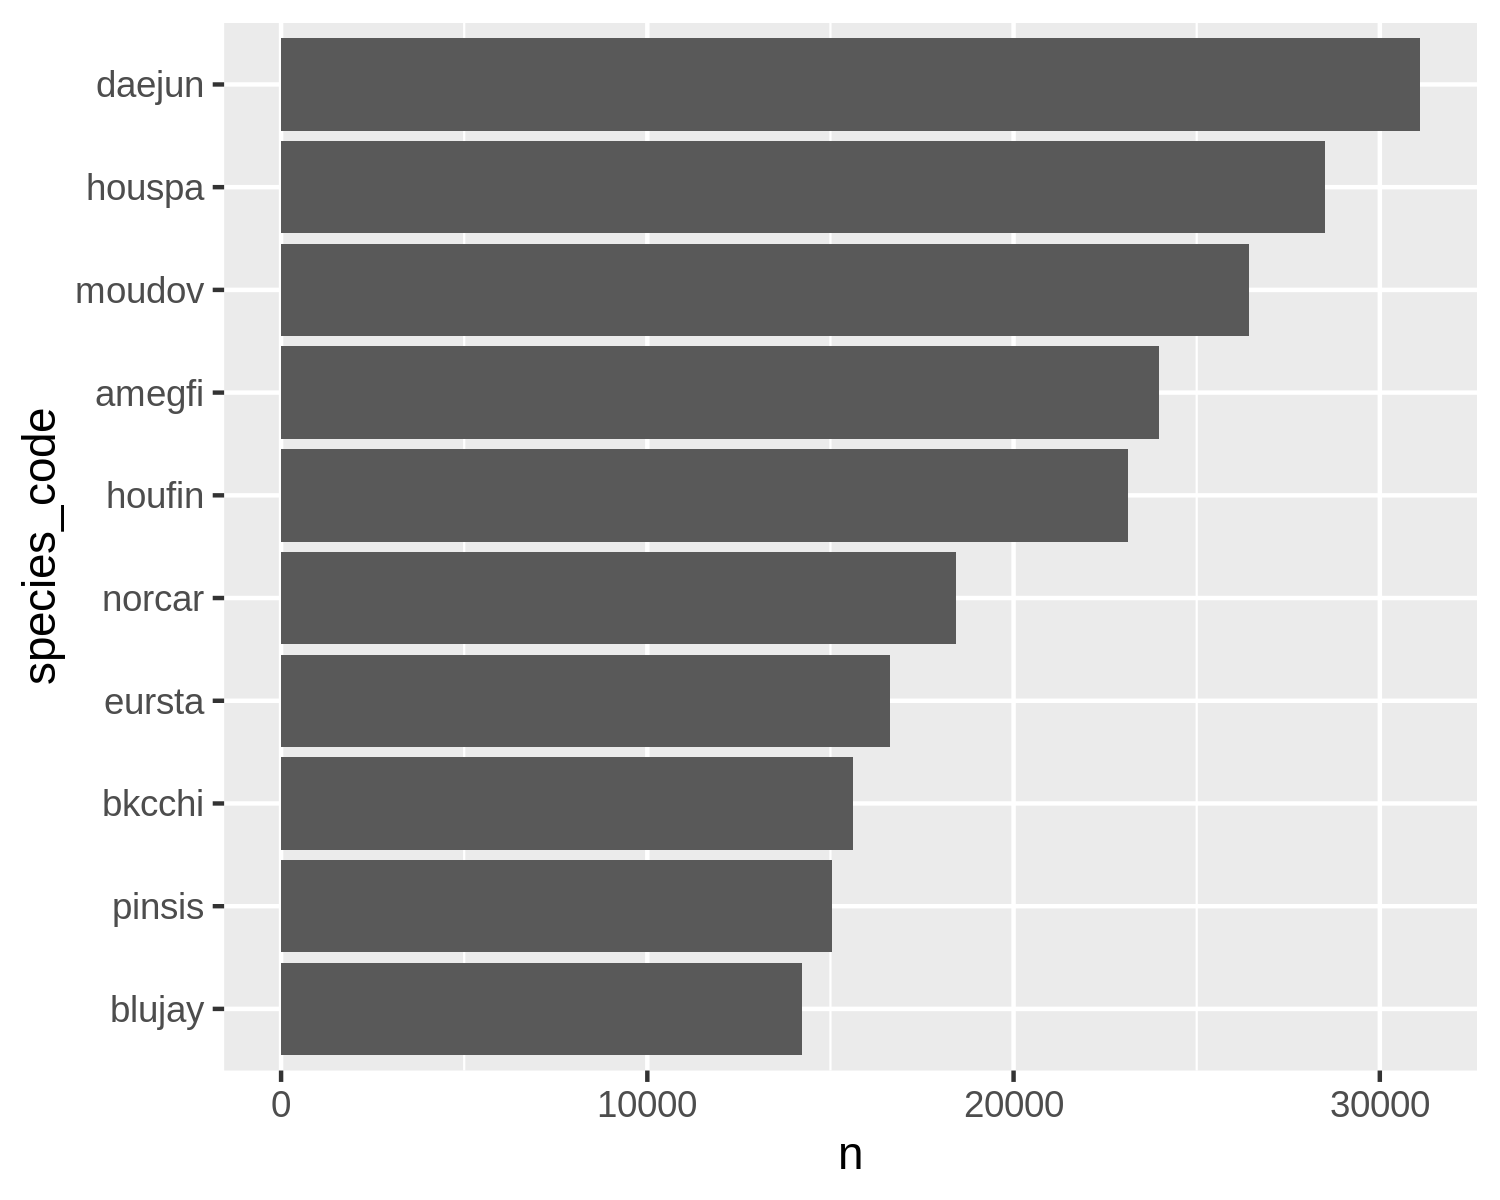

In [72]:
species_code_count = bird_feeder_data |>
    count(species_code, wt = how_many) |>
    arrange(desc(n)) |>
    mutate(species_code = fct_inorder(species_code) |> fct_rev())

top10_birds = species_code_count |> slice_max(order_by = n, n = 10) |> pull(species_code)

p = ggplot(species_code_count |> filter(species_code %in% top10_birds), 
           aes(y = species_code, x = n)) + geom_col()

p

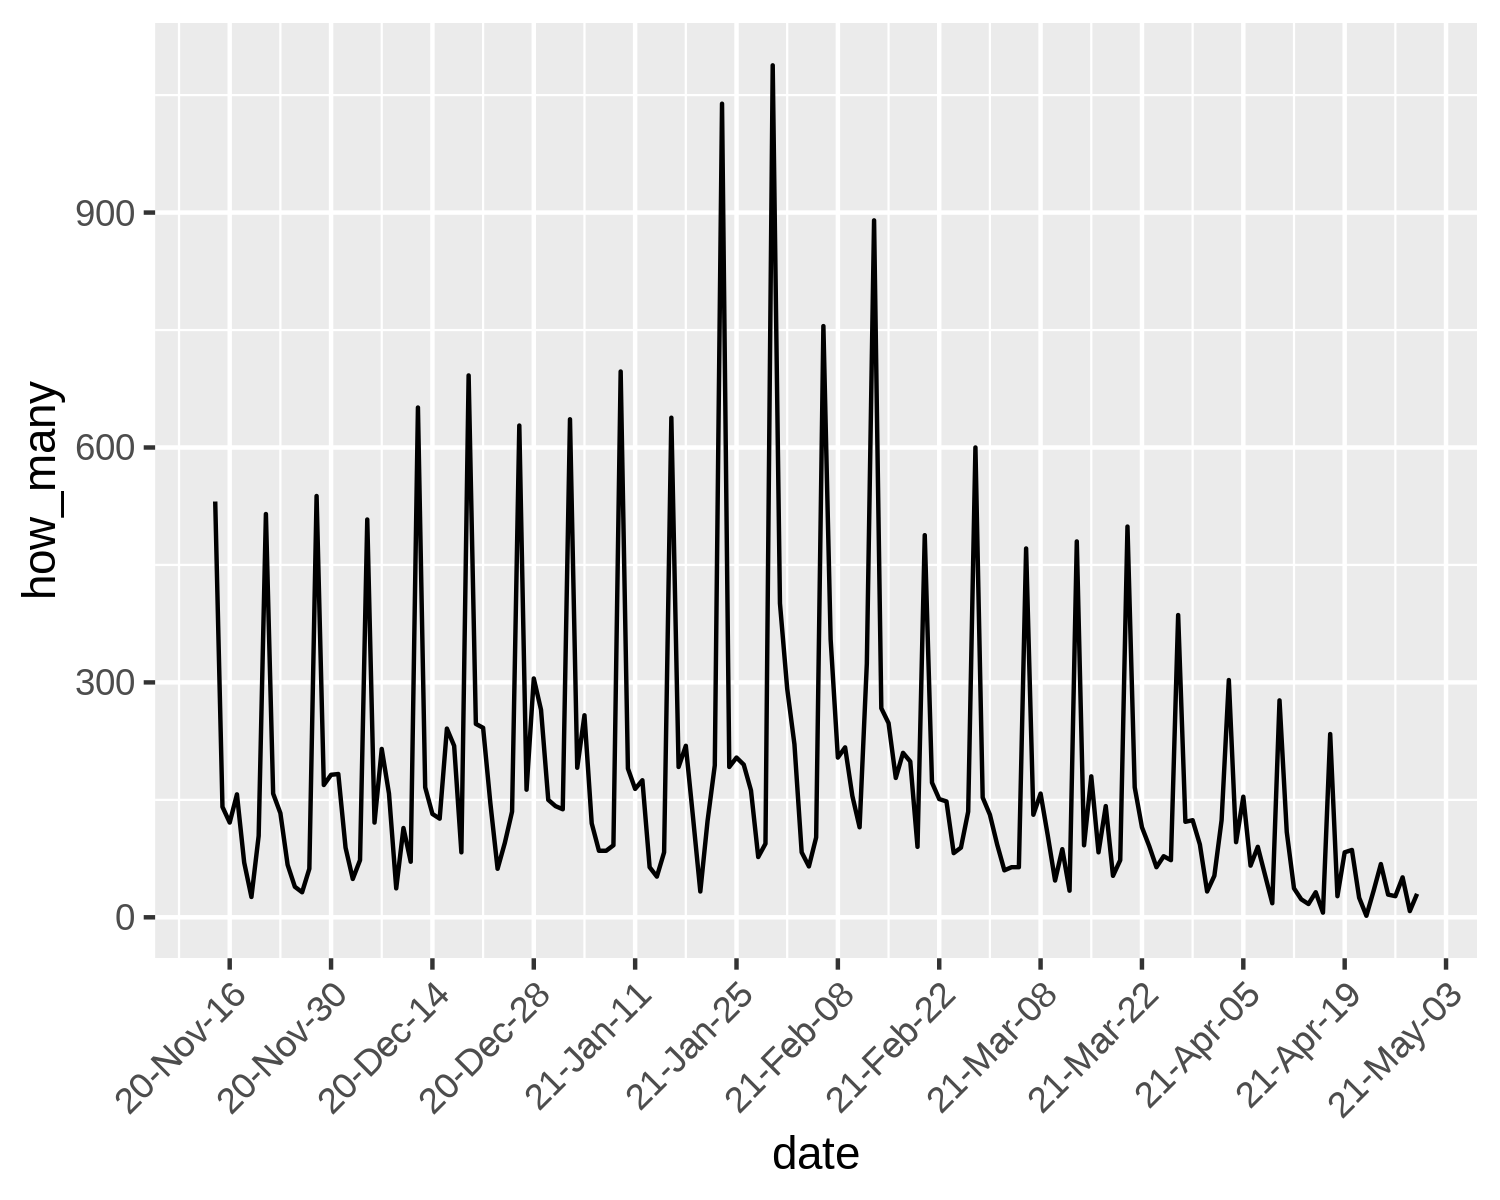

In [84]:
bird_feeder_data_daejun = bird_feeder_data |> 
    filter(species_code == 'daejun') |>
    group_by(date, species_code) |>
    summarize(how_many = sum(how_many), .groups = 'drop')

p = ggplot(bird_feeder_data_daejun, aes(x = date, y = how_many)) + 
    geom_line() +
    scale_x_date(date_breaks = '2 weeks', date_labels = '%y-%b-%d') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p